# EDA

## Marta ---------------------------------------------------------

put all of your code between here and the next person's name only

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

In [57]:
noaa_data = pd.read_csv('data/noaa_data_clean.csv', index_col= False)

In [58]:
noaa_data.columns

Index(['statecode', 'division', 'yearmonth', 'pcp', 'tavg', 'pdsi', 'phdi',
       'zndx', 'pmdi', 'cdd', 'hdd', 'sp01', 'sp02', 'sp03', 'sp06', 'sp09',
       'sp12', 'sp24', 'tmin', 'tmax', 'state', 'month', 'year'],
      dtype='object')

In [59]:
noaa_data.describe()

,statecode,division,yearmonth,pcp,tavg,pdsi,phdi,zndx,pmdi,cdd,...,sp02,sp03,sp06,sp09,sp12,sp24,tmin,tmax,month,year
count,4314.000000,4314.0,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000,...,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000
mean,3.666667,0.0,196048.217663,1.458368,54.116875,-0.095199,0.001043,-0.005239,-0.019657,103.726936,...,0.007112,0.008125,0.010046,0.012524,0.014374,0.012425,40.593788,67.631433,6.493046,1960.417246
std,1.247364,0.0,3459.660661,1.415186,15.279822,2.660944,2.800351,1.953196,2.652378,175.271156,...,0.990092,0.992436,0.995489,0.995738,0.995166,0.998943,14.379930,16.358553,3.449758,34.596709
min,2.000000,0.0,190101.000000,0.000000,12.800000,-9.090000,-9.090000,-5.910000,-9.090000,0.000000,...,-3.090000,-3.090000,-3.090000,-3.090000,-3.090000,-2.780000,-0.800000,25.800000,1.000000,1901.000000
25%,2.000000,0.0,193012.000000,0.510000,43.600000,-2.020000,-2.140000,-1.360000,-1.920000,0.000000,...,-0.660000,-0.680000,-0.680000,-0.690000,-0.670000,-0.690000,31.500000,55.225000,3.000000,1930.000000
50%,4.000000,0.0,196011.500000,1.120000,53.600000,-0.310000,-0.435000,-0.205000,-0.160000,12.500000,...,0.000000,0.010000,0.000000,0.020000,0.020000,0.010000,40.400000,67.400000,6.000000,1960.000000
75%,5.000000,0.0,199011.000000,1.950000,66.600000,1.767500,2.110000,1.090000,1.810000,127.000000,...,0.690000,0.660000,0.700000,0.700000,0.710000,0.660000,51.800000,81.400000,9.000000,1990.000000
max,5.000000,0.0,202010.000000,12.500000,84.100000,8.300000,8.300000,9.600000,8.300000,788.000000,...,3.090000,3.090000,3.070000,3.090000,3.090000,3.090000,68.800000,99.300000,12.000000,2020.000000


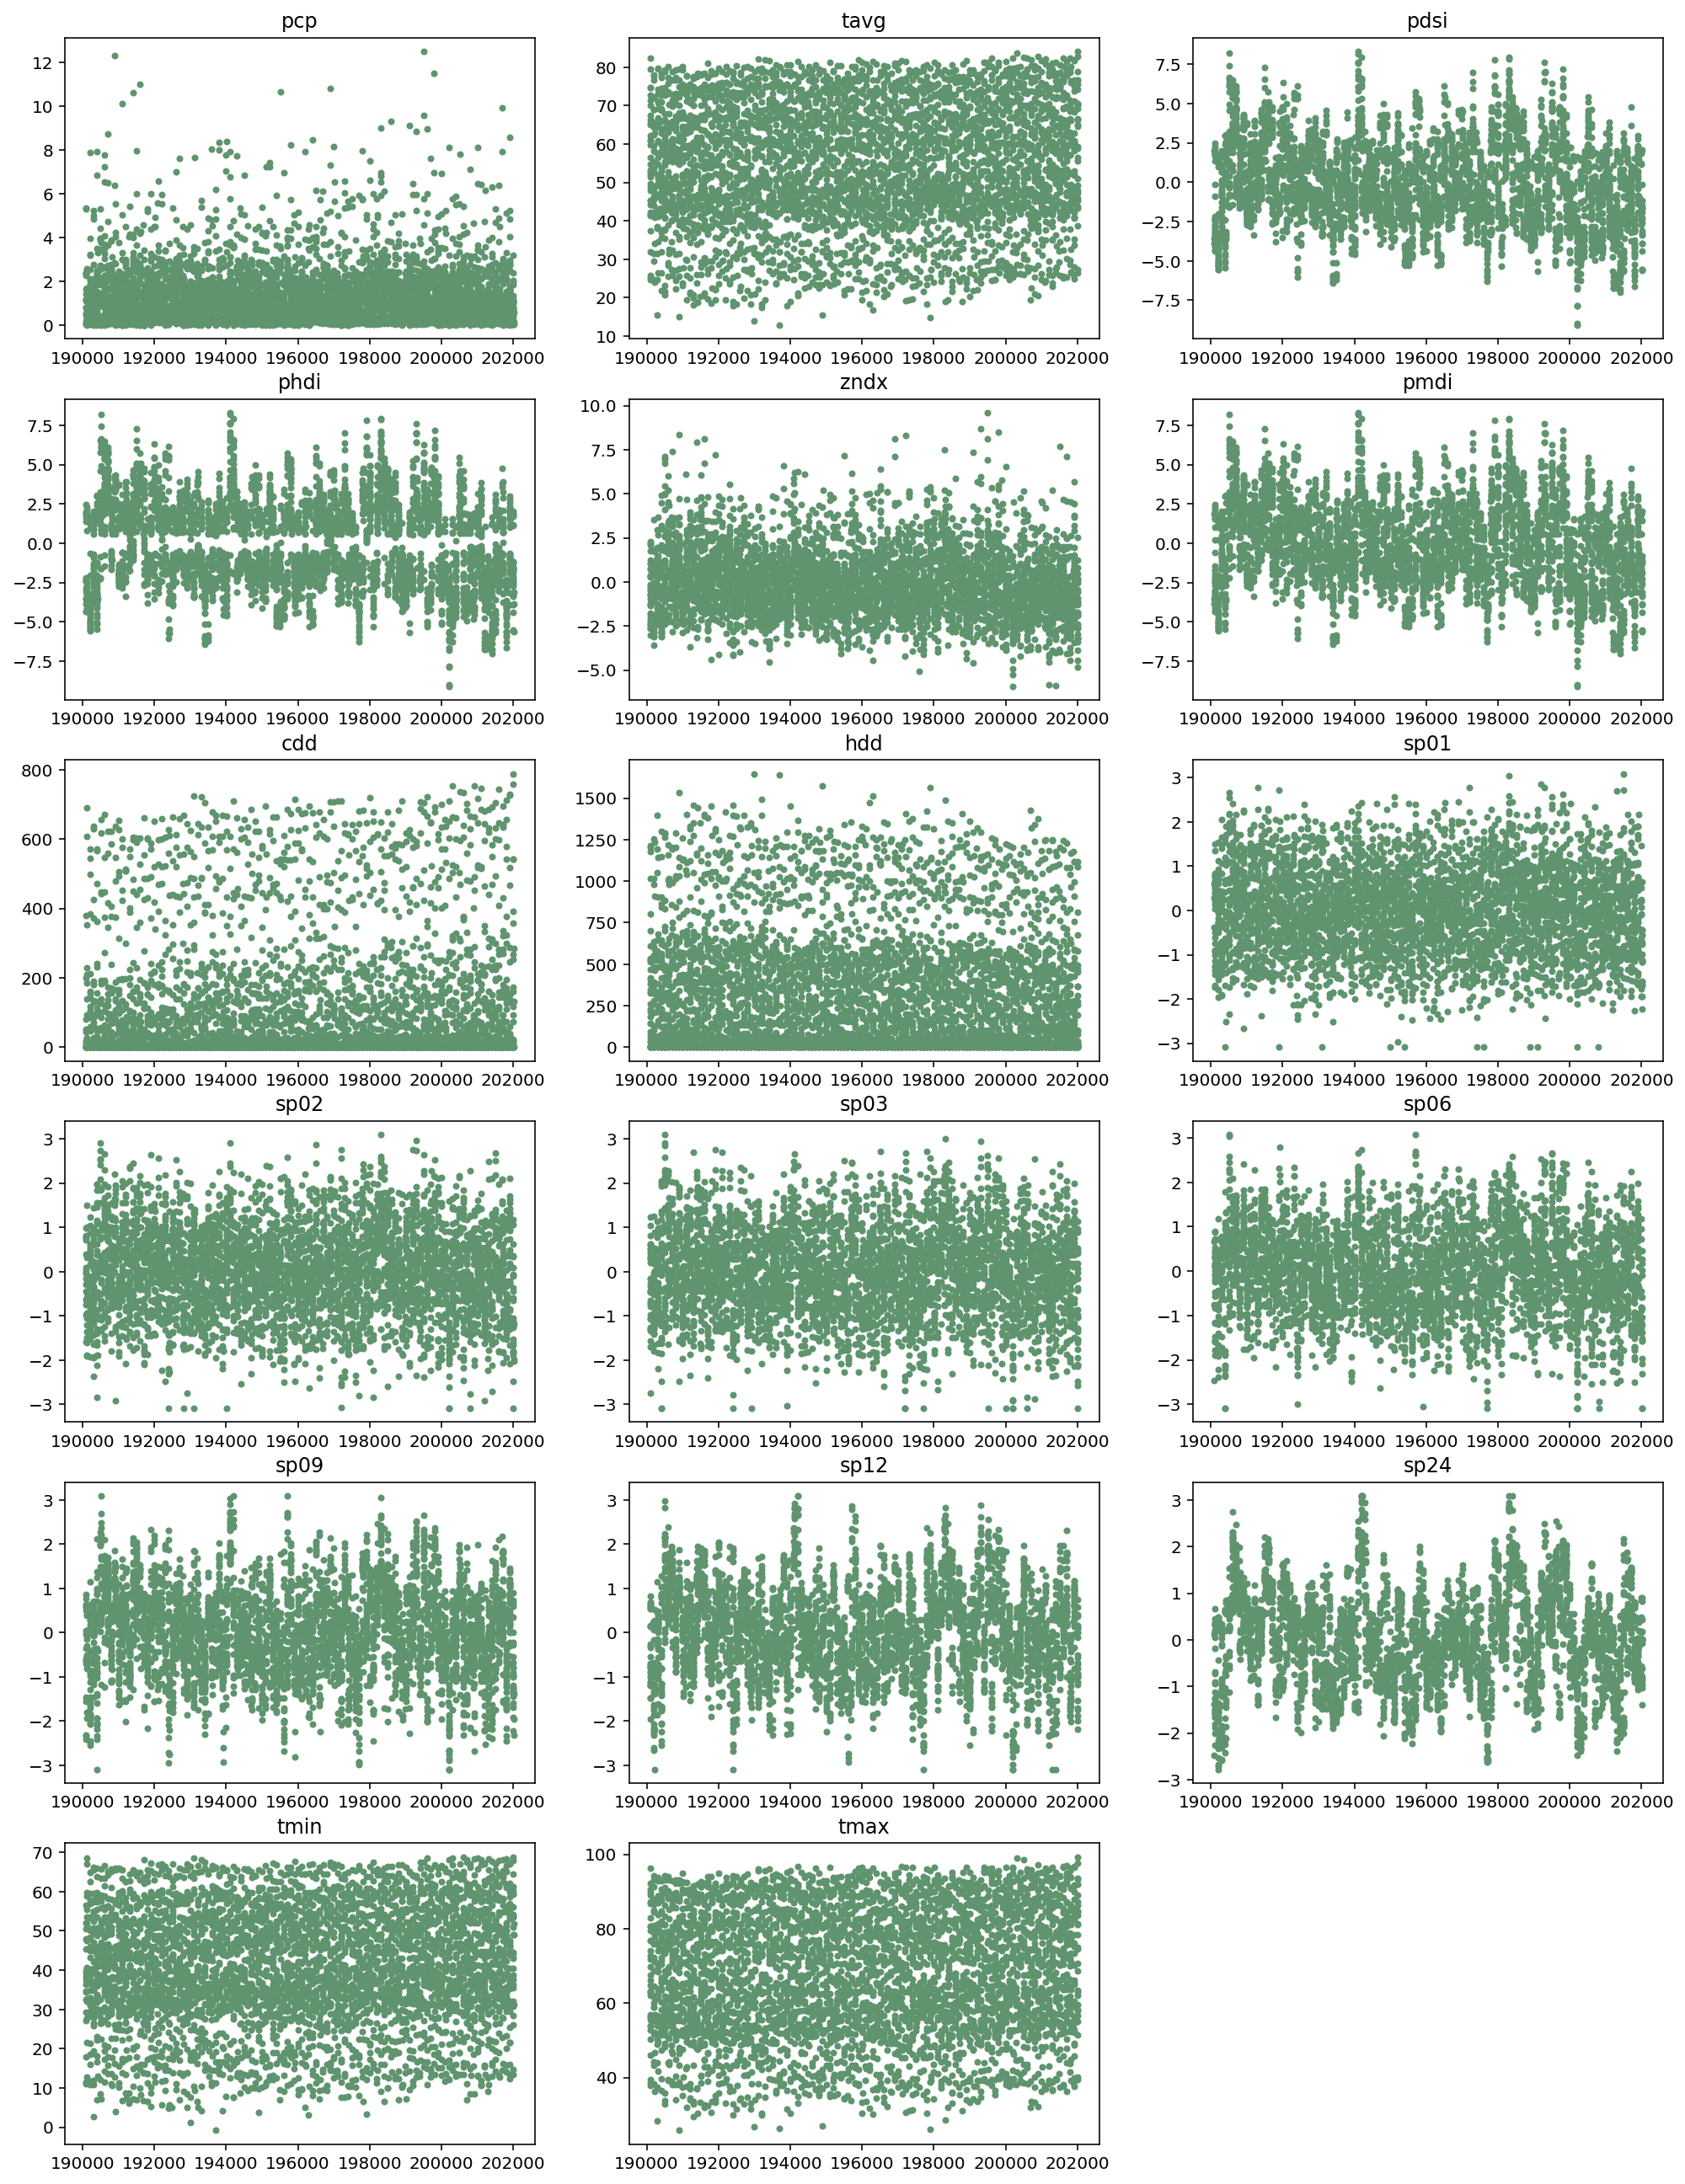

In [76]:
climate_cols = ['pcp', 'tavg', 'pdsi', 'phdi','zndx', 'pmdi', 'cdd', 'hdd', 'sp01', 'sp02', 'sp03', 'sp06', 'sp09',
               'sp12', 'sp24', 'tmin', 'tmax']

plt.figure(figsize=(17,23))
for i in range(len(climate_cols)):
    plt.subplot(6,3,i+1)
    plt.scatter(noaa_data['yearmonth'], noaa_data[climate_cols[i]], color = '#5f946e', marker = '.')
    plt.title(f"{climate_cols[i]}")
    
plt.savefig('./visuals/climate_scatters.png')

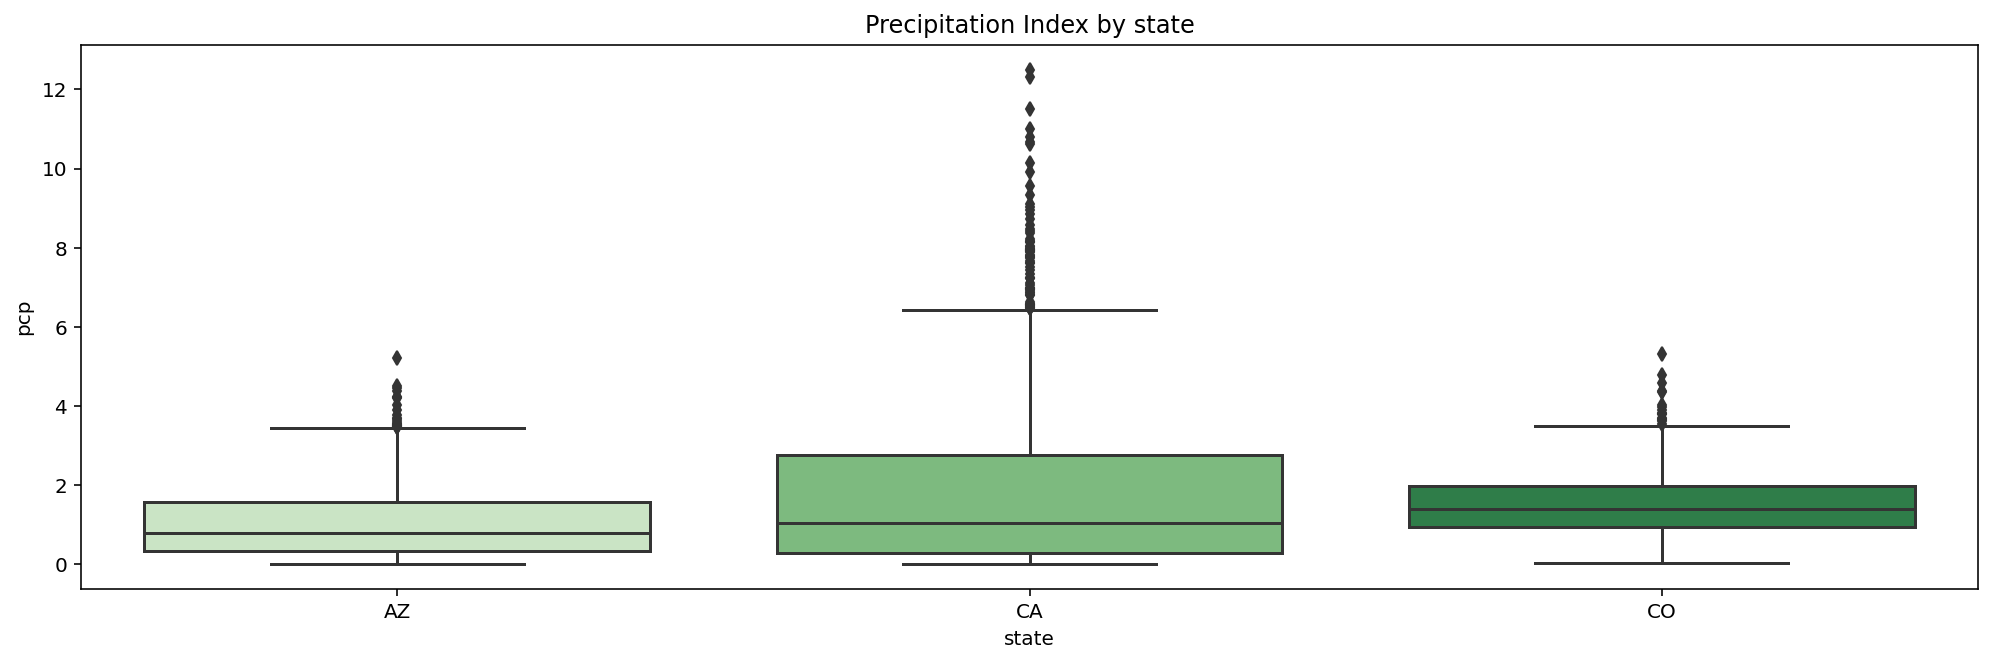

In [77]:
plt.figure(figsize = (17,5))
sns.boxplot(data = noaa_data, x = 'state', y = 'pcp', palette= 'Greens')
plt.title('Precipitation Index by state');
plt.savefig('./visuals/pcp_by_state.png')

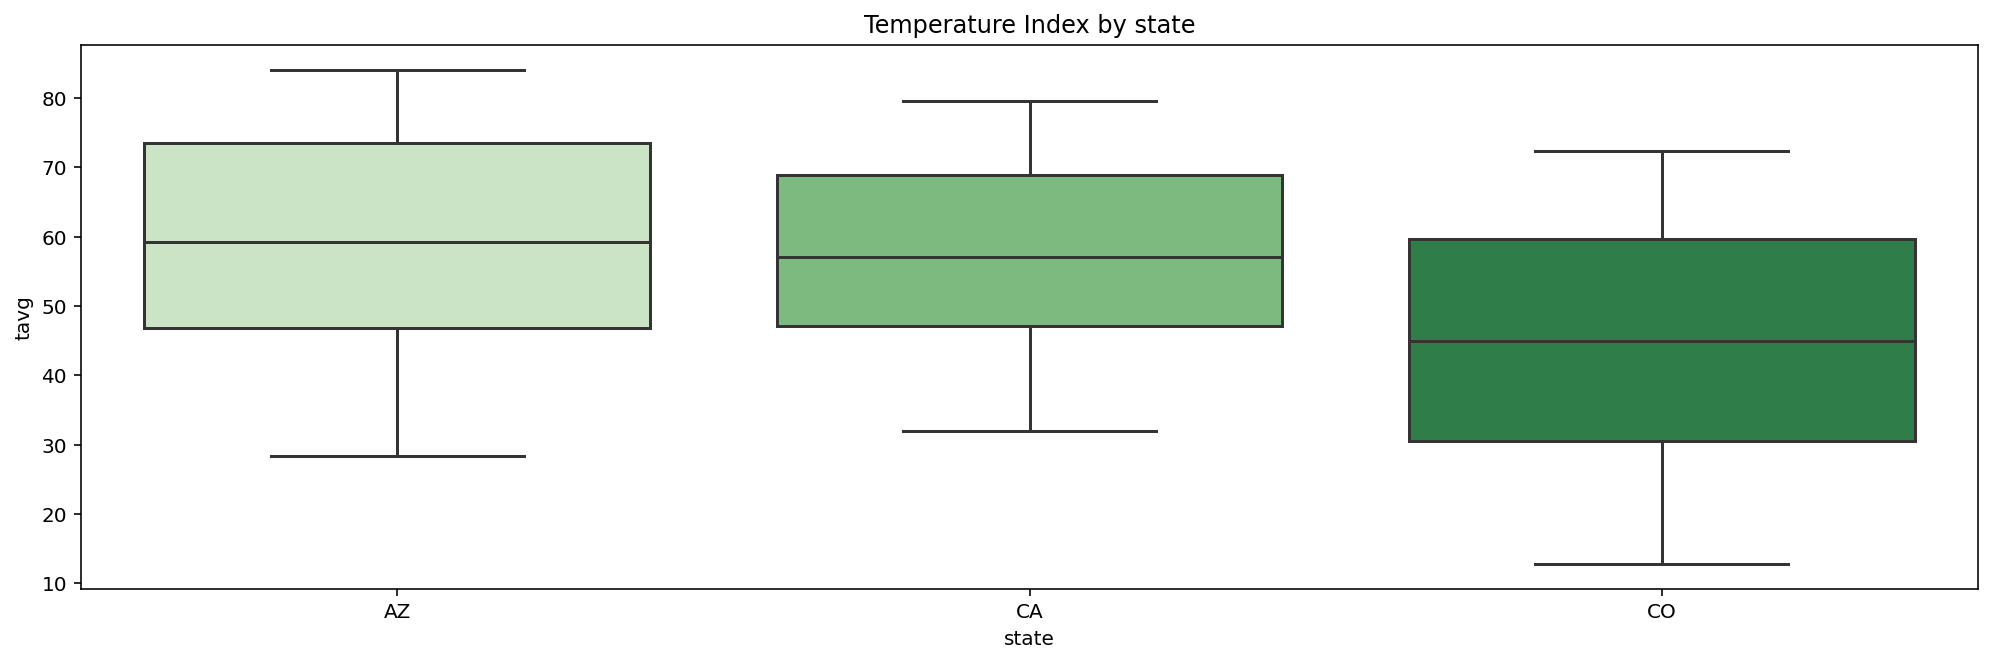

In [78]:
plt.figure(figsize = (17,5))
sns.boxplot(data = noaa_data, x = 'state', y = 'tavg', palette= 'Greens')
plt.title('Temperature Index by state');
plt.savefig('./visuals/tavg_by_state.png')

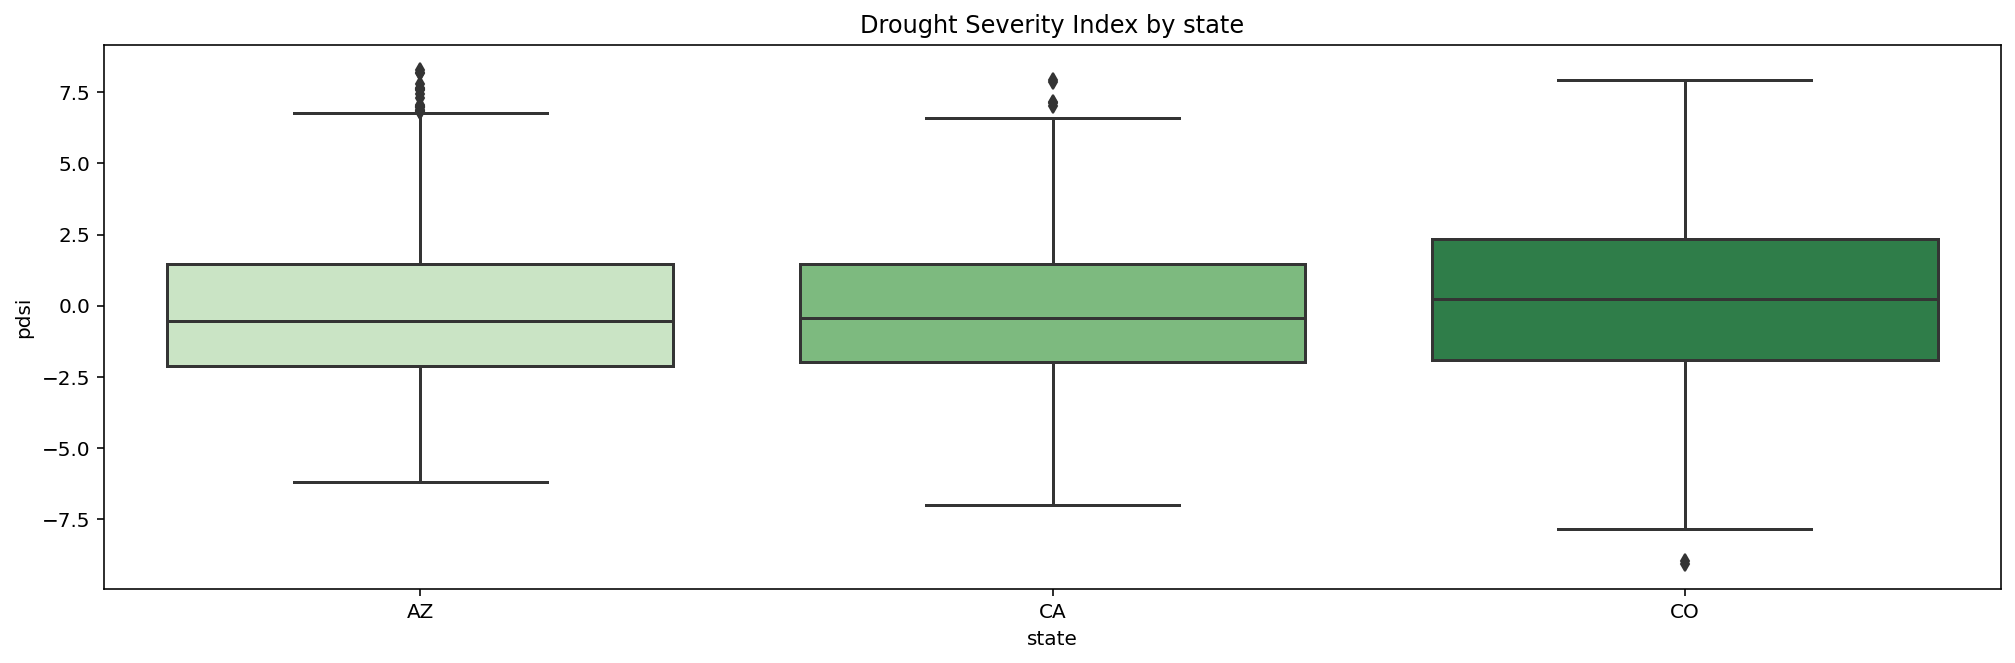

In [79]:
plt.figure(figsize = (17,5))
sns.boxplot(data = noaa_data, x = 'state', y = 'pdsi', palette= 'Greens')
plt.title('Drought Severity Index by state');
plt.savefig('./visuals/pdsi_by_state.png')

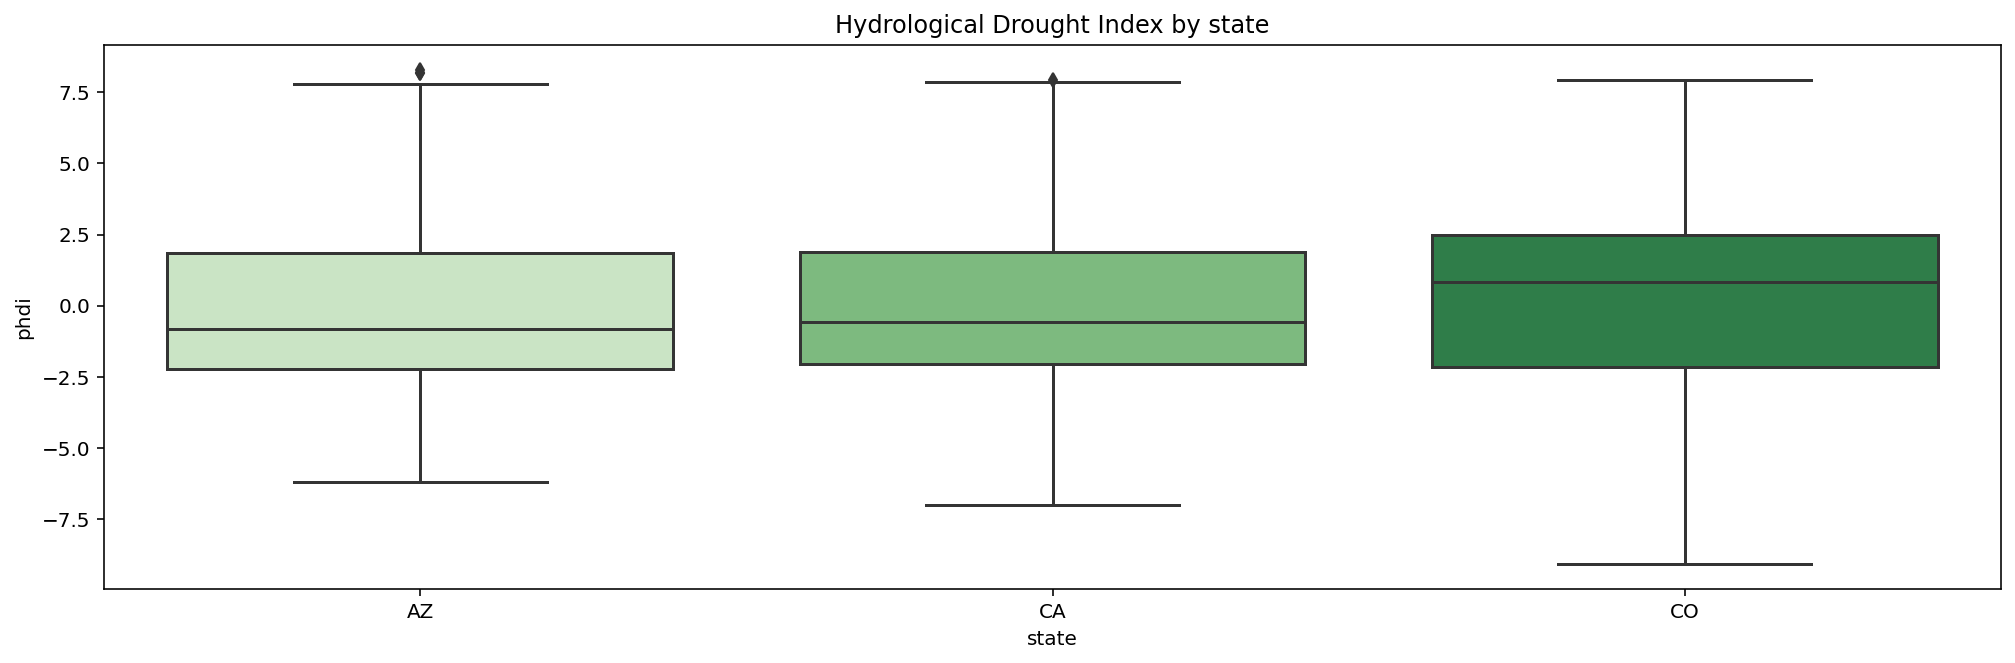

In [81]:
plt.figure(figsize = (17,5))
sns.boxplot(data = noaa_data, x = 'state', y = 'phdi', palette= 'Greens')
plt.title('Hydrological Drought Index by state');
plt.savefig('./visuals/phdi_by_state.png')

In [91]:
tmax_yr = noaa_data.groupby(['year'])['tmax'].mean()
tmax_yr_d = tmax_yr.to_dict()
noaa_data['avg_yr_tmax'] = noaa_data['year'].apply(lambda x: tmax_yr_d[x])

In [93]:
noaa_data.tail()

,statecode,division,yearmonth,pcp,tavg,pdsi,phdi,zndx,pmdi,cdd,...,sp06,sp09,sp12,sp24,tmin,tmax,state,month,year,avg_yr_tmax
4309,5,0,202006,1.13,65.0,-3.91,-3.91,-2.95,-3.91,94,...,-1.58,-1.29,-1.75,-0.79,49.1,81.0,CO,6,2020,74.01
4310,5,0,202007,1.84,69.3,-4.37,-4.37,-2.58,-4.37,161,...,-1.52,-1.33,-1.71,-0.87,54.1,84.5,CO,7,2020,74.01
4311,5,0,202008,0.80,70.0,-5.53,-5.53,-4.84,-5.53,173,...,-1.97,-1.91,-2.00,-1.03,53.6,86.4,CO,8,2020,74.01
4312,5,0,202009,0.99,58.9,-5.55,-5.55,-1.78,-5.55,17,...,-2.32,-2.22,-1.88,-0.96,42.9,74.9,CO,9,2020,74.01
4313,5,0,202010,0.57,47.3,-5.62,-5.62,-1.93,-5.62,0,...,-2.09,-2.31,-2.18,-1.39,31.2,63.5,CO,10,2020,74.01


## Jesse ---------------------------------------------------------

put all of your code between here and the next person's name only

## CM ---------------------------------------------------------

put all of your code between here and the next person's name only

## Kira ---------------------------------------------------------

put all of your code between here and the next person's name only